In [1]:
###P5. 例子2

import tensorflow as tf
import numpy as np


#create data
x_data = np.random.rand(100).astype(np.float32)
    #rand(d0,d1,...,dn) 随机生成1维，二维，n维随机数，类型为float32
y_data = x_data * 0.1 + 0.3


#create tensorflow structure start###
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
    #Weights 是tf中的一个变量，这个tf中的变量随机产生
    #random_uniform(shape, minval=0, maxval=None) shape:维度,minval:最小值,maxval：最大值
biases = tf.Variable(tf.zeros([1]))
    #tf.zeros()代表创建的所有n维元素都是0   tf.zeros([3, 4])  # [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

y = Weights * x_data + biases
d = tf.square(y - y_data)      #d = (y-y_data)^2
loss = tf.reduce_mean(d)
   # loss=[(y-y_data)^2] * n     #n是 y-y_data的个数

optimizer = tf.train.GradientDescentOptimizer(0.5)  #优化
train = optimizer.minimize(loss)        #取到optimizer中loss的最小值

init = tf.initialize_all_variables()    #初始化,激活所有的变量

#create tensorflow structure end###


#Very important
sess = tf.Session()     #需要在启动session之前构建整个计算图
sess.run(init)          #运行并启动该计算图  （）中表示要启动的位置，相当于指针


for step in range(201): #[0,201)  201步
    sess.run(train)
    if step %20 == 0:   # %  求余

        print(step,sess.run(Weights),sess.run(biases))  
        #Weights和biases 是 tensor(张量)，无法直接输出，只能通过sess.run 输出
#张量tensor在TensorFlow中的实现并不是直接采用数组形式，他只是对TensorFlow中的运算结果进行引用，
# 在张量中并没有真正的保存数字，只是保存的是如何得到这些数字的计算过程。





Instructions for updating:
Use `tf.global_variables_initializer` instead.


0 [ 0.21879049] [ 0.31049553]
20 [ 0.12147363] [ 0.28958195]
40 [ 0.1050102] [ 0.29756927]
60 [ 0.10116897] [ 0.29943287]
80 [ 0.10027274] [ 0.29986769]
100 [ 0.10006364] [ 0.29996914]
120 [ 0.10001486] [ 0.2999928]
140 [ 0.10000347] [ 0.29999831]
160 [ 0.10000084] [ 0.29999959]
180 [ 0.1000002] [ 0.29999992]
200 [ 0.10000006] [ 0.29999998]


In [4]:
### P6.Session 会话控制   的2种打开模式
import tensorflow as tf
import numpy as np

matrix1 = tf.constant([[3,4,5],      #  constant:精确值 ，最外面的[]表示这个矩阵，里面的[]表示一行，‘,'表示列
                      [5,2,7]])
matrix2 = tf.constant([[3,2,7],
                      [8,7,5],
                      [9,2,4]])
product = tf.matmul(matrix1,matrix2) #matmul = matrix mulmultiply 矩阵相乘
                                     #matrix multiply np.dot(m1,m2) 矩阵点乘
#method 1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()
#method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)


[[86 44 61]
 [94 38 73]]
[[86 44 61]
 [94 38 73]]


In [38]:
###P7  variable  变量的定义
import tensorflow as tf 

state = tf.Variable(0, name='counter')
one = tf.Variable(2)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)
            #assign分配，把new_value的值输入到state中，并输入到update中

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for _ in range(3):
    sess.run(update)
   
    print(sess.run(state))   

2
4
6


In [43]:

###P8 placeholder 传入值，占字符
import tensorflow as tf

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

#tf.placeholder(dtype,shape=None,name=None) 
# dtype=float32,float64...  shape=[m,n]  m行n列matrix

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.], input2:[2.]}))


[ 14.]


In [44]:
###P9:激励函数activation function
#现实没有我们想象的那么美好，他总是残酷多变的，233333
#神经网络中的每个节点接受输入值，并将输入值传递给下一层。输入节点会将输入属性值直接传递给下一层（隐层或输出层）。
# 在神经网络中，隐层和输出层节点的输入和输出之间具有函数关系，这个函数称为激励函数（Activation Function）
# 最常用的激励函数(AF)relu,sigmoid,tanh等,这些AF必须是可以微分的，在反向传播时候才可以把误差传递回去
#hidden layer不是很多时，随便使用，很多时要慎重。CNN一般使用relu，循环NN一般使用relu或tanh

In [46]:
###10：添加层 def.add_layer()

import tensorflow as tf

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.random_zeros[1, out_size]) + 0.1
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [ ]:
###11：bulid a neural network (建立一个新的神经网络)

import tensorflow as tf 
import numpy as np

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    #tf.zeros(shape,dtype=float32,name=None) shape:[m,n] m行n列 matrix
    #C(i,j)=A(i,j)+B(j) 叫Broadcasting 广播
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
#np.newaxis是分别在行或列上增加维度，原来是a=[0,1,2,3,4,5]是(6,)的数组,
# 使用a[np.newaxis,:]在行上面增加一个维度变成(1,6) 1行6列(matrix)
# 使用a[:,np.newaxis]在列上面增加一个维度变成(6,1) 6行1列(matrix)
# 此行命令中np.linspace(-1, 1, 300)是一个300个数的一维数组，使用[:,np.newaxis]变成(300,1) 300行1列二维数组(matrix)
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise


xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])


l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#由上面的add_layer()函数可以知道，此函数输出是outputs，所以l1是outputs，而outputs=Wx+b
prediction = add_layer(l1, 10, 1,activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
#请查看维度shape理解
#tf.reduce_sum(x, reduction_indices=[x])降维操作，sum:和
# reduction_indices=[0]:按行进行降维
# reduction_indices=[1]:按列进行降维
# reduction_indices没有说明，默认把行列均进行降维
# x = tf.constant([[1, 1, 1], [1, 1, 1]])
# tf.reduce_sum(x)  # 6
# tf.reduce_sum(x, 0)  # [2, 2, 2]    
# tf.reduce_sum(x, 1)  # [3, 3]
# tf.reduce_sum(x, 1, keepdims=True)  # [[3], [3]]
# tf.reduce_sum(x, [0, 1])  # 6
#tf.reduce_mean()   求平均值

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(400):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 100:
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))



SyntaxError: unexpected EOF while parsing (<ipython-input-3-3abaaff3c977>, line 61)

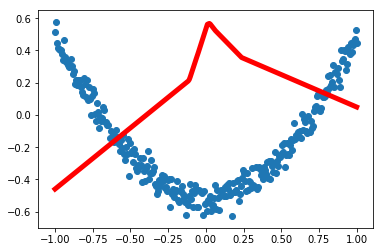

In [7]:
###12：结果可视化 plot result
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])


l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1,activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


init = tf.global_variables_initializer()

###相比于P11需要增加的可视化内容
fig = plt.figure()
ax = fig.add_subplot(1,1,1)   #加入子图，占1行1列的第一个位置
ax.scatter(x_data,y_data)     #scatter(分散) 散点图
###end


sess = tf.Session()
sess.run(init)




for i in range(400):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 100 == 0:

        # to see the step improvement
        # print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))

##相比于P11需要增加的可视化内容
        try:
            ax.lines.remove(lines[0])  #remove移除，再画下一条线(图形)之前移除画出的上一条线(图形)
        except Exception:
            pass
            #try-except-pass  的作用：做异常处理使用，执行try下的语句,如果没发生异常继续执行，如果发生异常,则会跳到except下的语句

        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)

        plt.pause(1) #pause暂停，多长时间更新一次
plt.ioff()  #plot.ion() 打开交互模式   plot.ioff()  显示前关闭交互模式




plt.show()  #显示 所绘制的图形
###end




In [ ]:
###P13:optimizer 优化器
# tensorflow社区中：tf.train.名称来查看帮助文档
#                  class tf.train.GradientDescentOptimizer
#  《深度学习》第8章  optimizer

In [1]:
###P14：Tensorboard  -  可视化神经网络
#  基于上次的例子
#  出现问题
